In [1]:
# 1) removing "connect" and using continuation instead
# 2) replace with symbolic - i.e., no need to render 


%load_ext autoreload
%autoreload 2

In [47]:
y = lambda a: lambda b: a-b
y(1)(2)

-1

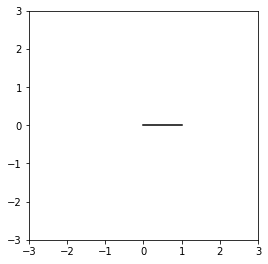

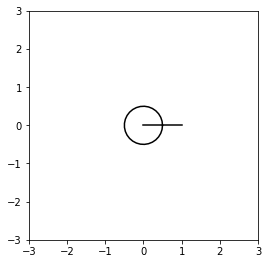

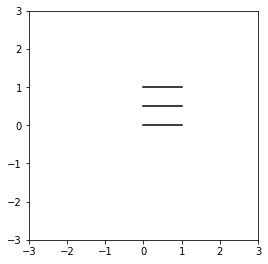

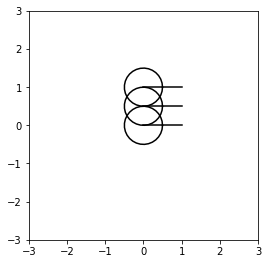

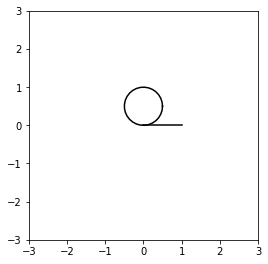

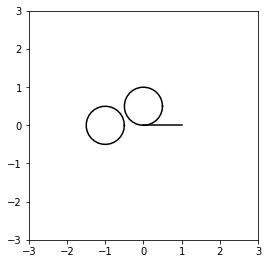

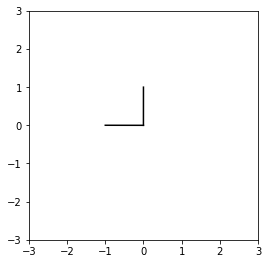

In [76]:
from dreamcoder.domains.draw.primitives import _lineC, _circleC, _finishC, _repeatC, _transformC, _reflectC, _emptystrokeC
from dreamcoder.domains.draw import primitives as P

# program 0, line + empty stroke
y = lambda a: _emptystrokeC()(_lineC()(a))
P.plot(y([]))

# program 1, line + circle
y = lambda a: _lineC()(_circleC()(a))
P.plot(y([]))

# program 2, repeat line
# y = lambda a: _repeatC(_lineC(), 3, P._makeAffine(y=0.5))(a)
y = lambda a: _repeatC(3, P._makeAffine(y=0.5))(_lineC()(a))(a)
P.plot(y([]))

# program 3, repeat of (line connected to circle)
# y = lambda a: _repeatC(_lineC(), 3, P._makeAffine(y=0.5))(a)
y = lambda a: _repeatC(3, P._makeAffine(y=0.5))(_circleC()(_lineC()(a)))(a)
P.plot(y([]))

# program 4, (line + transformed circle)
y = lambda a: _lineC()(_transformC(P._makeAffine(y=0.5))(_circleC()(a))(a))
P.plot(y([]))

# program 5, transformed circle connected to (line + transformed circle)
y = lambda a: _transformC(P._makeAffine(x=-1))(_circleC()(a))(_lineC()(_transformC(P._makeAffine(y=0.5))(_circleC()(a))(a)))
P.plot(y([]))

# program 6, reflection
y = lambda a: _reflectC(theta=1.57)(_lineC()(a))(_reflectC(theta=0.785)(_lineC()(a))(a))
P.plot(y([]))

In [148]:
from dreamcoder.program import *
p = Program.parse("(lambda (lineC (emptystrokeC $0)))")
p.evaluate([])(_lineC()([]))


TypeError: _emptystrokeC() takes 0 positional arguments but 1 was given

In [91]:
from dreamcoder.domains.draw.main import dreamFromGrammar

dreams = dreamFromGrammar(N=10)

[print(d) for d in dreams]

(lambda (lineC (emptystrokeC $0)))
(lambda $0)
(lambda $0)
(lambda (emptystrokeC $0))
(lambda (circleC (repeatC $0 $0 rep3 (transmat (Some scale1) None (Some dist10) None (Some tsr)) $0)))
(lambda (lineC (emptystrokeC (circleC $0))))
(lambda $0)
(lambda (circleC $0))
(lambda (emptystrokeC $0))
(lambda $0)


[None, None, None, None, None, None, None, None, None, None]

In [118]:
i = 7

dreams[i].evaluate([])([])

TypeError: _circleC() takes 0 positional arguments but 1 was given

In [132]:
dreams[i].runWithArguments(_finishC())

TypeError: 'function' object is not iterable

In [31]:
# P._lineC
P._finishdraw()(P._lineC()(P._lineC()))

TypeError: can only concatenate list (not "function") to list

In [30]:
# works
P._circleC()(P._lineC()(P._lineC()(P._lineC())))

TypeError: can only concatenate list (not "function") to list

In [20]:
# repeats
# y = P._finishdraw()(P._circleC()(P._repeatC(P._lineC(), 4, P._makeAffine(y=0.5))))
y = P._finishdraw()((P._repeatC(P._lineC(), 4, P._makeAffine(y=0.5))))
P.plot(y)

SyntaxError: invalid syntax (<ipython-input-20-3f506883dc42>, line 8)

In [ ]:
P._lineC()([])(P._lineC())

In [ ]:
P._lineC(P._emptystroke)(["adasd"])

In [ ]:
P._finishdraw(P._lineC(P._lineC(P._emptystroke)))

In [ ]:
y = P._lineC(P._circleC(P._emptystroke))
# y(P._emptystroke)

# y(P._emptystroke)
# or

drawing = P._finishdraw(y)

print(drawing)
P.plot(drawing)



In [ ]:
P._repeatC(y, 2, P._makeAffine(x=1.))